### Set Up Environment

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
sns.set()

In [2]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

### Read csv file 

In [3]:
filepath =  "C:\\Users\\LENOVO\\Desktop\\Project1\\Sales Data.csv"

In [4]:
sales_data_org = pd.read_csv(filepath, 
                             delimiter = ",",
                             header = 0,
                            index_col = 'Order ID')

Create a copy of data as a checkpoint just incase a mess up happens during their analysis 

In [5]:
sales_data = sales_data_org.copy()

In [6]:
### Full dataframe overview
pd.options.display.max_columns = None
pd.options.display.min_rows = None

In [7]:
### Have an overview of the data
sales_data.head(11)

,Unnamed: 0,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Order ID,,,,,,,,,,
295665,0,Macbook Pro Laptop,1,1700.00,30-12-19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
295666,1,LG Washing Machine,1,600.00,29-12-19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
295667,2,USB-C Charging Cable,1,11.95,12-12-19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
295668,3,27in FHD Monitor,1,149.99,22-12-19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
295669,4,USB-C Charging Cable,1,11.95,18-12-19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
295670,5,AA Batteries (4-pack),1,3.84,31-12-19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
295671,6,USB-C Charging Cable,1,11.95,16-12-19 15:10,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
295672,7,USB-C Charging Cable,2,11.95,13-12-19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
295673,8,Bose SoundSport Headphones,1,99.99,15-12-19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23


In [8]:
### Drop "Unnamed: 0" column
sales_data = sales_data.drop('Unnamed: 0', axis=1)
sales_data.columns

Index(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 295665 to 222909
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Quantity Ordered  185950 non-null  int64  
 2   Price Each        185950 non-null  float64
 3   Order Date        185950 non-null  object 
 4   Purchase Address  185950 non-null  object 
 5   Month             185950 non-null  int64  
 6   Sales             185950 non-null  float64
 7   City              185950 non-null  object 
 8   Hour              185950 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 14.2+ MB


In [10]:
### Basic statistics 
sales_data.describe()

,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917,14.413305
std,0.442793,332.731330,3.502996,332.919771,5.423416
min,1.000000,2.990000,1.000000,2.990000,0.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [11]:
print("\nNumber of duplicate Rows:\n",sales_data.duplicated(keep ='first').sum())
duplicate_row = sales_data.duplicated(keep='first')
print("\nDuplicate Rows:\n", duplicate_row.head(4))


Number of duplicate Rows:
 264

Duplicate Rows:
 Order ID
295665    False
295666    False
295667    False
295668    False
dtype: bool


In [12]:
sales_data = sales_data.drop_duplicates()
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 295665 to 222909
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185686 non-null  object 
 1   Quantity Ordered  185686 non-null  int64  
 2   Price Each        185686 non-null  float64
 3   Order Date        185686 non-null  object 
 4   Purchase Address  185686 non-null  object 
 5   Month             185686 non-null  int64  
 6   Sales             185686 non-null  float64
 7   City              185686 non-null  object 
 8   Hour              185686 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 14.2+ MB


In [13]:
### Basic stats after removing duplicate columns
sales_data.describe()

,Quantity Ordered,Price Each,Month,Sales,Hour
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,7.058653,185.611936,14.412934
std,0.443069,332.843838,3.502932,333.032118,5.423329
min,1.000000,2.990000,1.000000,2.990000,0.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [14]:
### Have an overvie of the data
sales_data.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Order ID,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,30-12-19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
295666,LG Washing Machine,1,600.00,29-12-19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
295667,USB-C Charging Cable,1,11.95,12-12-19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18


In [15]:
number_of_orders = sales_data.index.nunique()
number_of_orders

178437

In [16]:
### Number of items.
number_of_items = sales_data['Product'].nunique()
number_of_items

19

In [17]:
all_product = sales_data["Product"].unique()
for i in all_product:
    print(i, end = " ")

Macbook Pro Laptop LG Washing Machine USB-C Charging Cable 27in FHD Monitor AA Batteries (4-pack) Bose SoundSport Headphones AAA Batteries (4-pack) ThinkPad Laptop Lightning Charging Cable Google Phone Wired Headphones Apple Airpods Headphones Vareebadd Phone iPhone 20in Monitor 34in Ultrawide Monitor Flatscreen TV 27in 4K Gaming Monitor LG Dryer 

In [18]:
## Confirm if the "Sales" column is equivalent to "Quantity Ordered" * "Price Each"
## Create a new column "Total Sales" and compare the 2
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Total Sales
Order ID,,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,30-12-19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00
295666,LG Washing Machine,1,600.00,29-12-19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00
295667,USB-C Charging Cable,1,11.95,12-12-19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95
295668,27in FHD Monitor,1,149.99,22-12-19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99
295669,USB-C Charging Cable,1,11.95,18-12-19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95


In [19]:
print("'Sales' Columnn Data type:", sales_data['Sales'].dtype)
print("'Total Sales' Columnn Data type:", sales_data['Total Sales'].dtype)

'Sales' Columnn Data type: float64
'Total Sales' Columnn Data type: float64


In [20]:
### The 2 columns are not equal
sales_data['Sales'] .equals(sales_data['Total Sales'])

False

In [21]:
df = sales_data['Sales'] == sales_data['Total Sales']
df.head()

Order ID
295665    True
295666    True
295667    True
295668    True
295669    True
dtype: bool

In [22]:
df = df.replace({True : 1, False : 0})
df.unique()

array([1, 0], dtype=int64)

In [23]:
### Check the number of rows that Total Sales and Sales do not match
df.value_counts()

1    185260
0       426
Name: count, dtype: int64

In [24]:
sales_data.columns

Index(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Total Sales'],
      dtype='object')

In [25]:
### Check the row which the sales '426' and Totol sales don't match
sales_comparison_df = sales_data[['Sales', 'Total Sales']]
sales_comparison_df['Difference'] = (sales_comparison_df['Sales'] - sales_comparison_df['Total Sales'])
sales_comparison_df = sales_comparison_df.query("Difference != 0.0")
print("sales_comparison_df shape:" , sales_comparison_df.shape)
print("\nsales_comparison_df shape :\n",sales_comparison_df.head())

### so the difference is basically because of scientific notation in the Difference column

sales_comparison_df shape: (426, 3)

sales_comparison_df shape :
           Sales  Total Sales    Difference
Order ID                                  
296254    35.85        35.85  7.105427e-15
296462    14.95        14.95 -1.776357e-15
296718    14.95        14.95 -1.776357e-15
297340    44.85        44.85  7.105427e-15
297765    35.85        35.85  7.105427e-15


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2324\3545756095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_comparison_df['Difference'] = (sales_comparison_df['Sales'] - sales_comparison_df['Total Sales'])


In [26]:
### Correct the scientific notation
sales_comparison_df = sales_data[['Sales', 'Total Sales']]
sales_comparison_df['Difference'] = (sales_comparison_df['Sales'] - sales_comparison_df['Total Sales']).astype(int)
sales_comparison_df = sales_comparison_df.query("Difference != 0.0")
sales_comparison_df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2324\2743826494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_comparison_df['Difference'] = (sales_comparison_df['Sales'] - sales_comparison_df['Total Sales']).astype(int)


,Sales,Total Sales,Difference
Order ID,,,


In [27]:
### delete  "Sales" Row since we no longer need it
del(sales_data['Sales'])

In [28]:
sales_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Total Sales
Order ID,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,30-12-19 00:01,"136 Church St, New York City, NY 10001",12,New York City,0,1700.00
295666,LG Washing Machine,1,600.00,29-12-19 07:03,"562 2nd St, New York City, NY 10001",12,New York City,7,600.00
295667,USB-C Charging Cable,1,11.95,12-12-19 18:21,"277 Main St, New York City, NY 10001",12,New York City,18,11.95
295668,27in FHD Monitor,1,149.99,22-12-19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco,15,149.99
295669,USB-C Charging Cable,1,11.95,18-12-19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta,12,11.95


In [29]:
### Check the Highest sort after product ie product with the highest sell counts
Product_Vs_QuantityOrd = sales_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
Product_Vs_QuantityOrd = Product_Vs_QuantityOrd.sort_values(by = 'Quantity Ordered', ascending = False)
Product_Vs_QuantityOrd

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30986
4,AA Batteries (4-pack),27615
15,USB-C Charging Cable,23931
12,Lightning Charging Cable,23169
17,Wired Headphones,20524
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
2,27in FHD Monitor,7541
18,iPhone,6847
1,27in 4K Gaming Monitor,6239


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2324\1477721732.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad = 0.02)


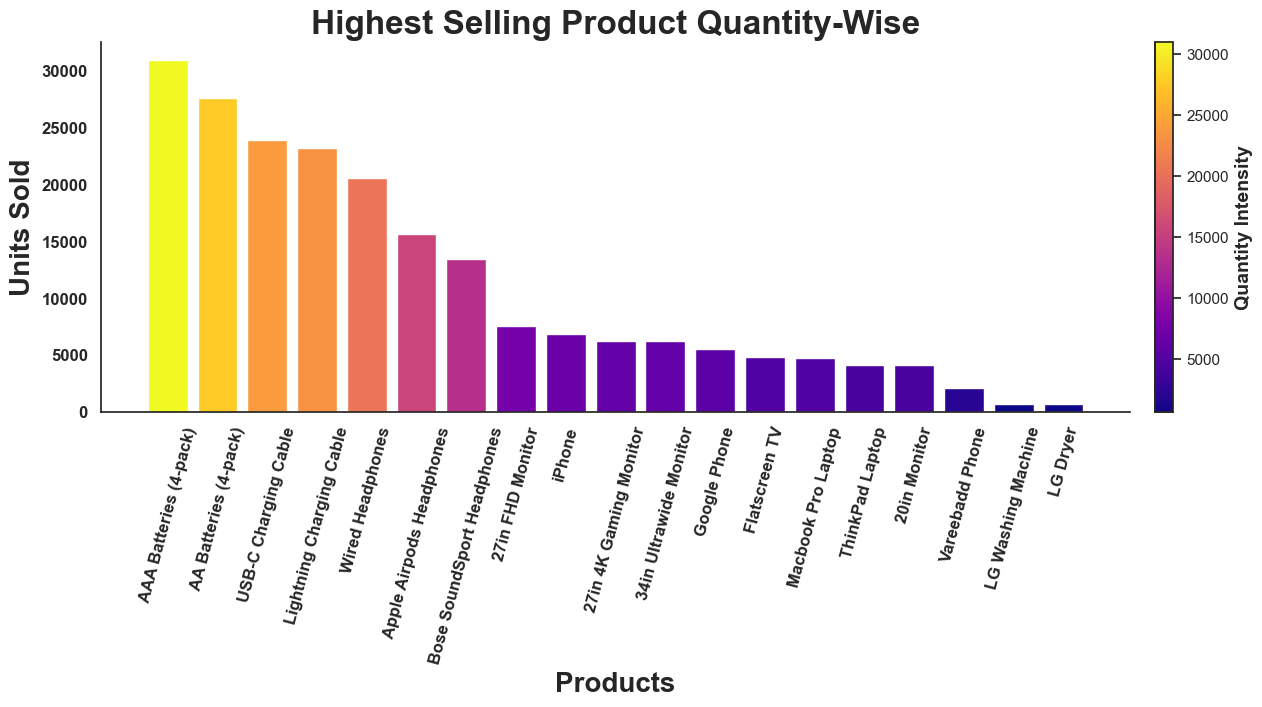

In [30]:
sns.set_style('white')
plt.figure(figsize = (16, 4.8))
norm = Normalize(vmin=Product_Vs_QuantityOrd["Quantity Ordered"].min(),
                 vmax=Product_Vs_QuantityOrd["Quantity Ordered"].max())
sm = ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
bars = plt.bar(x=Product_Vs_QuantityOrd["Product"],
               height=Product_Vs_QuantityOrd["Quantity Ordered"],
               color=sm.to_rgba(Product_Vs_QuantityOrd["Quantity Ordered"]))
cbar = plt.colorbar(sm, orientation='vertical', pad = 0.02)
cbar.set_label('Quantity Intensity', fontsize=14, weight='bold')
plt.xticks(rotation = 75, 
           weight = 'bold',
          fontsize = 12)
plt.yticks(weight = 'bold', 
          fontsize = 12)
plt.title("Highest Selling Product Quantity-Wise", fontsize = 24, weight = "bold")
plt.xlabel("Products", 
           fontsize = 20,
          weight = 'bold')
plt.ylabel("Units Sold",
          fontsize = 20,
          weight = 'bold')
sns.despine()
plt.show()

In [31]:
sales_data.columns

Index(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Hour', 'Total Sales'],
      dtype='object')

In [32]:
### Check the highest revenue generating products
product_Vs_Total_sales = sales_data.groupby('Product')['Total Sales'].sum().reset_index()
product_Vs_Total_sales = product_Vs_Total_sales.sort_values(by = 'Total Sales', ascending = False)
print(product_Vs_Total_sales.head(3))
print(product_Vs_Total_sales.tail(3))

               Product  Total Sales
13  Macbook Pro Laptop   8032500.00
18              iPhone   4792900.00
14     ThinkPad Laptop   4127958.72
                   Product  Total Sales
17        Wired Headphones    246082.76
4    AA Batteries (4-pack)    106041.60
5   AAA Batteries (4-pack)     92648.14


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2324\548397549.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad = 0.02)


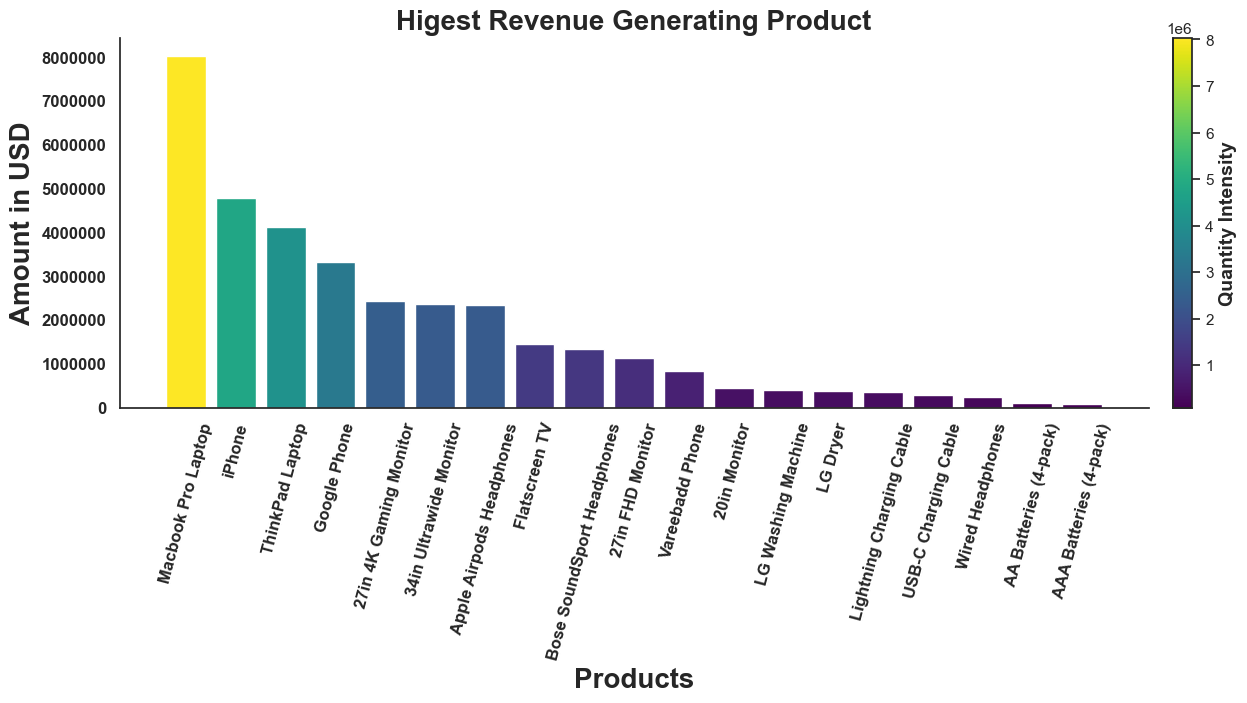

In [33]:
sns.set_style('white')
plt.figure(figsize = (16, 4.8))
norm = Normalize(vmin = product_Vs_Total_sales["Total Sales"].min(),
                 vmax = product_Vs_Total_sales["Total Sales"].max())
sm = ScalarMappable(cmap = 'viridis', norm = norm)
sm.set_array([])
bars = plt.bar(x = product_Vs_Total_sales["Product"],
               height = product_Vs_Total_sales["Total Sales"],
               color = sm.to_rgba(product_Vs_Total_sales["Total Sales"]))
cbar = plt.colorbar(sm, orientation='vertical', pad = 0.02)
cbar.set_label('Quantity Intensity', fontsize=14, weight='bold')
plt.xticks(rotation = 75, 
           weight = 'bold',
          fontsize = 12)
plt.yticks(weight = 'bold', 
          fontsize = 12)
plt.ticklabel_format(style='plain', axis='y') ### remove scientific notation
plt.title("Higest Revenue Generating Product", fontsize = 20, weight = "bold")
plt.xlabel("Products", 
           fontsize = 20,
          weight = 'bold')
plt.ylabel("Amount in USD",
          fontsize = 20,
          weight = 'bold')
sns.despine()
plt.show()

### Conclusion
Unlike what we would have thought the highest selling product is not the highest income geretaing commodity.

Turns out the Markbook Pro Laptop which is among the least selling product with just "4725" units is the highest revenue genetarating item in our list with a total revenue of "8032500.00" USD.

Unlike the Triple A batteries which combined have sold "586101" units but then they have gerenated the least income totalling to "198689.6" USD which is just but 2 percent of what the mac does in terms of revenue.

Consequently the company should emphasize more on advertising items like th macbook pro laptop and iphones, to boot revenue 

In [34]:
### Check Order Date data type
sales_data['Order Date'][: 0] ## check data type

Series([], Name: Order Date, dtype: object)

In [35]:
## Convert to time date data type
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2324\3513294712.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])


In [36]:
## Voilà
sales_data['Order Date'][:1]

Order ID
295665   2019-12-30 00:01:00
Name: Order Date, dtype: datetime64[ns]

In [37]:
sales_data['Order Date'].head()

Order ID
295665   2019-12-30 00:01:00
295666   2019-12-29 07:03:00
295667   2019-12-12 18:21:00
295668   2019-12-22 15:13:00
295669   2019-12-18 12:38:00
Name: Order Date, dtype: datetime64[ns]

In [38]:
sales_data['Year'] = sales_data['Order Date'].dt.year
print("Years in the sales_data",sales_data['Year'].unique())
print("\nYear count:\n", sales_data['Year'].value_counts())

Years in the sales_data [2019 2020]

Year count:
 Year
2019    185652
2020        34
Name: count, dtype: int64


The above code shows that no sighnificant inferences can be drawn from analysing the yeah metrics

In [39]:
sales_data['Month2'] = sales_data['Order Date'].dt.month
sales_data['Month2'].head()

Order ID
295665    12
295666    12
295667    12
295668    12
295669    12
Name: Month2, dtype: int32

In [40]:
### Check if 'Months' and "Months2" column are the same
df1 = sales_data['Month'] - (sales_data['Month2'])
print(df1.value_counts().head(2))
print('\nNumber of row with_ unmatching month:\n', 185950 - 119256)


0    119081
1      5773
Name: count, dtype: int64

Number of row with_ unmatching month:
 66694


In [41]:
### Check out why these rows don't match
### Check which between the 'Month' and "Months2" columns has incorrect data and delete it.
month_comparison_df = sales_data.loc[sales_data['Month'] != sales_data["Month2"]]
month_comparison_df.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Total Sales,Year,Month2
Order ID,,,,,,,,,,,
295678,AAA Batteries (4-pack),2,2.99,2019-06-12 09:38:00,"187 Lincoln St, Dallas, TX 75001",12,Dallas,9,5.98,2019,6
295680,Lightning Charging Cable,1,14.95,2019-01-12 14:30:00,"338 Main St, Austin, TX 73301",12,Austin,14,14.95,2019,1
295684,AAA Batteries (4-pack),4,2.99,2019-04-12 12:29:00,"936 Church St, San Francisco, CA 94016",12,San Francisco,12,11.96,2019,4


In [42]:
## Delete Row with incorrect months
sales_data = sales_data.drop('Month', axis=1)
sales_data.columns

Index(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'City', 'Hour', 'Total Sales', 'Year', 'Month2'],
      dtype='object')

In [43]:
## Change months 2 Column name
sales_data.rename(columns = {'Month2': "Month"},
                  inplace = True)
sales_data.columns

Index(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'City', 'Hour', 'Total Sales', 'Year', 'Month'],
      dtype='object')

In [44]:
## Check in which month do most sales happen
monthly_sales = sales_data.groupby('Month')['Total Sales'].sum().reset_index()
monthly_sales

,Month,Total Sales
0,1,2284818.59
1,2,2393981.89
2,3,2791020.41
3,4,3228561.31
4,5,3031130.14
5,6,2683101.40
6,7,2719467.98
7,8,2442972.91
8,9,2410665.80
9,10,3473646.66


In [45]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
print(month_names, end = " ")

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 

In [46]:
for i, month_name in enumerate(month_names):
    monthly_sales['Month'] = monthly_sales['Month'].replace(i + 1, month_name)
monthly_sales

,Month,Total Sales
0,January,2284818.59
1,February,2393981.89
2,March,2791020.41
3,April,3228561.31
4,May,3031130.14
5,June,2683101.40
6,July,2719467.98
7,August,2442972.91
8,September,2410665.80
9,October,3473646.66


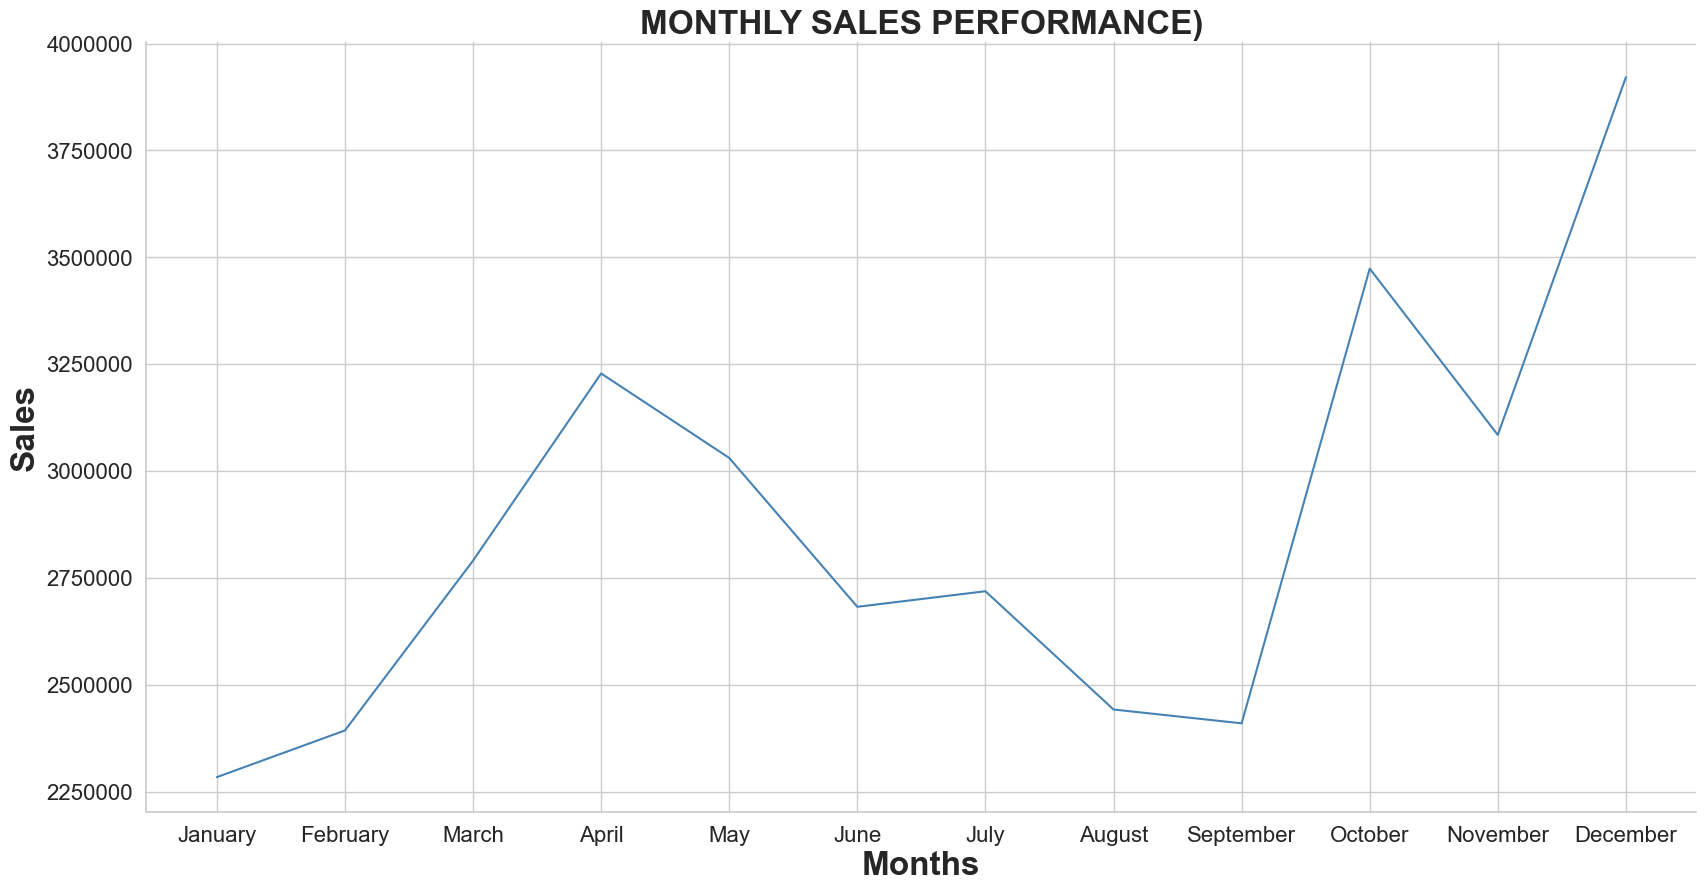

In [47]:
### Plot Total Sales against Months
sns.set_style('whitegrid')
plt.figure(figsize = (20, 10))
plt.plot(monthly_sales['Month'], 
         monthly_sales['Total Sales'],
         color ="#4682B4"
         )
plt.title("MONTHLY SALES PERFORMANCE)", fontsize = 24, fontweight = 'bold')

plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

plt.xlabel("Months", 
           fontsize = 24 ,
          fontweight = "bold")
plt.ylabel("Sales",
           fontsize = 24, 
           fontweight = 'bold')

plt.ticklabel_format(style='plain', axis='y') ### remove scientific notation
sns.despine()
plt.show()

### Conclusion


Most Sales occur in the month of December thereafter there is a significant drop in the month of January, after which the sales rise until April from which sighnificant another drop in experienced until September from which sales rise till December and a slight drop November 

In [48]:
## Days of the week
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Month'].head(3)

Order ID
295665    12
295666    12
295667    12
Name: Month, dtype: int32

In [49]:
### Create a column with all the days of the week
### Create a function
def Day_of_the_Week(date_value):
    return date_value.weekday()

sales_data['Day of the week'] = sales_data['Order Date'].apply(Day_of_the_Week)
sales_data.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Hour,Total Sales,Year,Month,Day of the week
Order ID,,,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,0,1700.00,2019,12,0
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,7,600.00,2019,12,6
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,18,11.95,2019,12,3


In [50]:
# monthly_sales
Day_of_the_week_sales = sales_data.groupby('Day of the week')['Total Sales'].sum().reset_index()
Day_of_the_week_sales['Total Sales'] = Day_of_the_week_sales['Total Sales'] / 1000
Day_of_the_week_sales.head(3)

,Day of the week,Total Sales
0,0,4919.37549
1,1,5102.50771
2,2,4904.19832


In [51]:
Day_of_the_week_sales = Day_of_the_week_sales.replace({0:"Monday",
                                                       1:"Tuesday",
                                                       2:"Wednesday",
                                                       3:"Thursday",
                                                       4:"Friday",
                                                       5:"Sartuday",
                                                       6:"Sunday"})
Day_of_the_week_sales.head(3)

,Day of the week,Total Sales
0,Monday,4919.37549
1,Tuesday,5102.50771
2,Wednesday,4904.19832


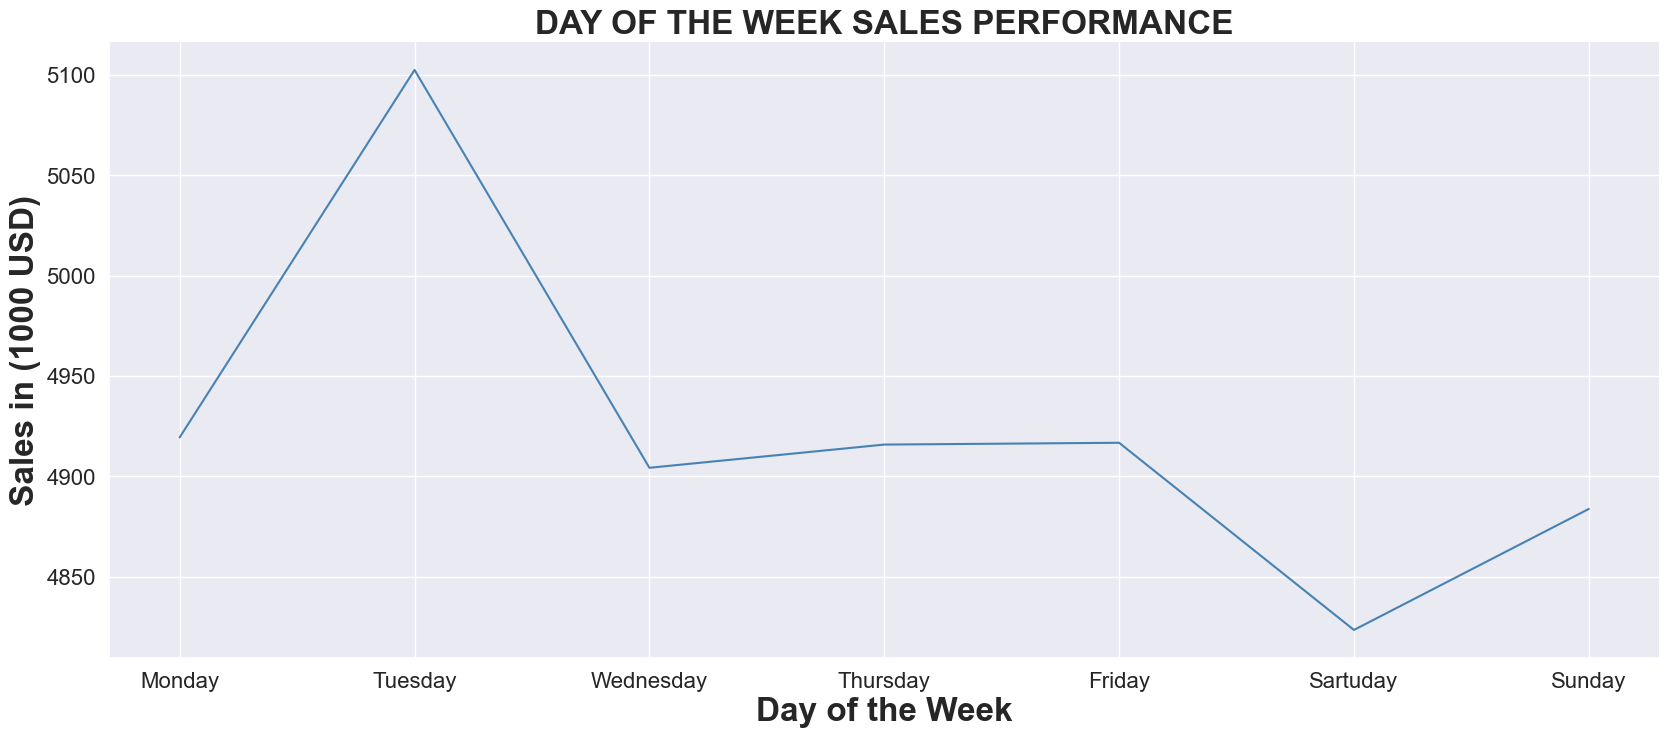

In [52]:
### Plot Day of the week against Total sales

sns.set_style('darkgrid')
plt.figure(figsize = (20, 8))
plt.plot(Day_of_the_week_sales['Day of the week'], 
         Day_of_the_week_sales['Total Sales'],
         color ="#4682B4"
         )
plt.title("DAY OF THE WEEK SALES PERFORMANCE"
          , fontsize = 24, fontweight = 'bold')

plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

plt.xlabel("Day of the Week", 
           fontsize = 24 ,
          fontweight = "bold")
plt.ylabel("Sales in (1000 USD)",
           fontsize = 24, 
           fontweight = 'bold')

plt.ticklabel_format(style='plain', axis='y') ### remove scientific notation
sns.despine()
plt.show()

### Conclusion


Most clients purchase commodities on weekdays and Tuesday being the day where most purchases are done and the is very little buying over the weekend. which could be attributed maybe closure of most business premises

In [53]:
month = sales_data['Order Date'].dt.strftime('%B')
print(month.head(3))
print("\nDatatype is:\n", month.dtype)

Order ID
295665    December
295666    December
295667    December
Name: Order Date, dtype: object

Datatype is:
 object


In [54]:
day_of_the_week = sales_data['Order Date'].dt.day_name()
print(day_of_the_week.head(3))
print("\nDatatype is:\n",day_of_the_week.dtype)

Order ID
295665      Monday
295666      Sunday
295667    Thursday
Name: Order Date, dtype: object

Datatype is:
 object


In [55]:
month = pd.Series(month)
day_of_the_week = pd.Series(day_of_the_week)
month.name = 'month'
day_of_the_week.name = 'day_of_the_week'
print(month.shape)
print(day_of_the_week.shape)

(185686,)
(185686,)


In [56]:
month_and_day_of_the_week = pd.concat([month, day_of_the_week], axis=1)
month_and_day_of_the_week = month_and_day_of_the_week.rename(columns={'Order Date': 'month', 'Order Date': 'day_of_the_week'})
month_and_day_of_the_week.head(3)

,month,day_of_the_week
Order ID,,
295665,December,Monday
295666,December,Sunday
295667,December,Thursday


In [57]:
month_and_day_of_the_week = month_and_day_of_the_week.groupby(['month', 'day_of_the_week']).size().unstack()
month_and_day_of_the_week.head(3)

day_of_the_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2479,2399,2314,2330,2482,2615,2379
August,1952,2124,2277,1976,1859,1596,1644
December,2899,3335,2858,3098,2989,3558,2803


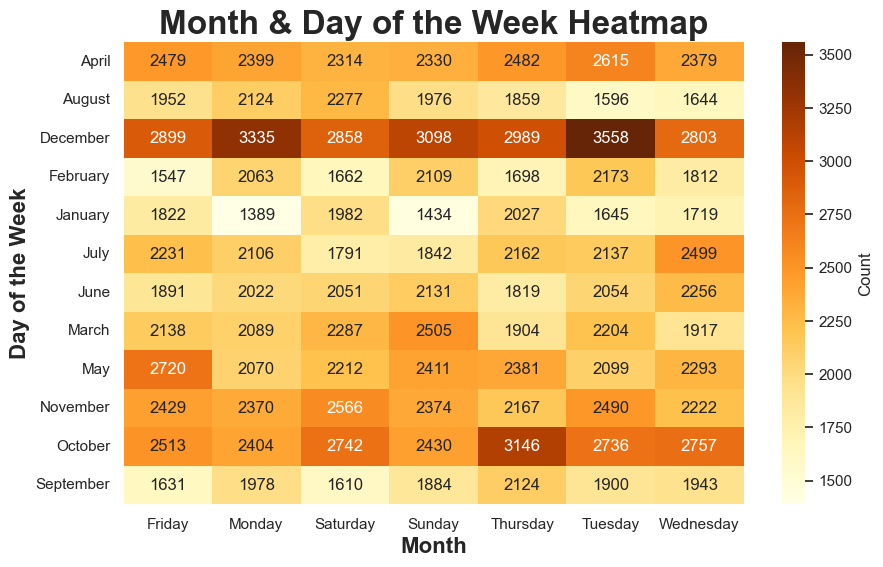

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(month_and_day_of_the_week
            , cmap='YlOrBr', 
            annot=True, fmt='d',
            cbar_kws={'label': 'Count'})
plt.xlabel("Month", 
           fontsize = 16 ,
          fontweight = "bold")
plt.ylabel("Day of the Week",
           fontsize = 16, 
           fontweight = 'bold')
plt.title("Month & Day of the Week Heatmap", fontsize = 24, weight = "bold")
plt.show()

### Conclusion

The above heatmap is a good guide of wich particular day of the month is best to roll out a promotion or when to invest in advertising and marketing dependimg on top management beliefs.That is if it's best to do the former and the latter when a sales of a product are at their highest of when they are at thier lowest.

In [59]:
sales_data.head(2)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Hour,Total Sales,Year,Month,Day of the week
Order ID,,,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,0,1700.0,2019,12,0
295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,7,600.0,2019,12,6


In [60]:
## Extract Hour from 'Order Date' columns
sales_data['Hour2'] = sales_data['Order Date'].dt.hour
sales_data.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Hour,Total Sales,Year,Month,Day of the week,Hour2
Order ID,,,,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,0,1700.00,2019,12,0,0
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,7,600.00,2019,12,6,7
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,18,11.95,2019,12,3,18


In [61]:
#### Since we have an existing Hour Column
### Check if the 2 columns are have matchinng data
sales_data['Hour'].equals(sales_data['Hour2'])

False

In [62]:
### Check the rows that do not match
hour_df_comparison = sales_data[['Hour', 'Hour2']]
hour_df_comparison['Difference'] = (hour_df_comparison['Hour'] - hour_df_comparison['Hour2'])
hour_df_comparison = hour_df_comparison.query("Difference != 0.0")
print("sales_comparison_df shape:" , hour_df_comparison.shape)
print("\nsales_comparison_df shape :\n",hour_df_comparison.head(3))

### Seems like there is no difference

sales_comparison_df shape: (0, 3)

sales_comparison_df shape :
 Empty DataFrame
Columns: [Hour, Hour2, Difference]
Index: []


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2324\3139046736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_comparison['Difference'] = (hour_df_comparison['Hour'] - hour_df_comparison['Hour2'])


In [63]:
### delete 'Hour2 column', seem like there is no columnn with a problem
del(sales_data['Hour2'])

In [64]:
sales_data.columns

Index(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'City', 'Hour', 'Total Sales', 'Year', 'Month',
       'Day of the week'],
      dtype='object')

In [65]:
### See which time of the day are there most sales
hr_vs_Totalsales = sales_data.groupby('Hour')['Total Sales'].sum().reset_index()
hr_vs_Totalsales.head(3)

,Hour,Total Sales
0,0,713548.66
1,1,460563.90
2,2,234839.45


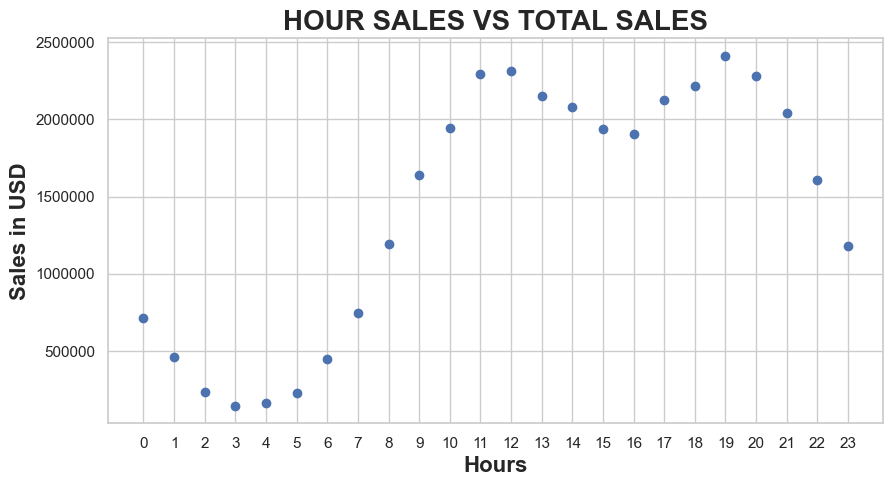

In [66]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
plt.scatter(hr_vs_Totalsales['Hour'],
           hr_vs_Totalsales['Total Sales'])
plt.title("HOUR SALES VS TOTAL SALES", fontsize = 20, fontweight = 'bold')
plt.xticks(hr_vs_Totalsales['Hour'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Hours", 
           fontsize = 16,
          fontweight = "bold")
plt.ylabel("Sales in USD",
           fontsize = 16, 
           fontweight = 'bold')
plt.show()

### Conclusion

Most client do their purchases at 7 pm, there the rate of puchase dicline until 3 where, we see the least purchases occuring after which we experience a tremendous increas in client purchase until it's peak at 7pm , we however also have a small drop in client purchase as from  12 noon until 5pm.

In [67]:
sales_data.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Hour,Total Sales,Year,Month,Day of the week
Order ID,,,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,0,1700.00,2019,12,0
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,7,600.00,2019,12,6
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,18,11.95,2019,12,3


In [68]:
city_names = sales_data['City'].unique()
for i in city_names:
    print(i)

 New York City
 San Francisco
 Atlanta
 Portland
 Dallas
 Los Angeles
 Boston
 Austin
 Seattle


In [69]:
### See city with highest sales
city_vs_Totalsales = sales_data.groupby('City')['Total Sales'].sum().reset_index()
city_vs_Totalsales['Total Sales'] = city_vs_Totalsales['Total Sales'] / 1000
city_vs_Totalsales = city_vs_Totalsales.sort_values(by = 'Total Sales')
city_vs_Totalsales.head(3)

,City,Total Sales
1,Austin,1818.04433
6,Portland,2319.33194
8,Seattle,2745.04602


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2324\2742315784.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation ='horizontal', pad =0.1)  # Set cbar orientation to 'horizontal'


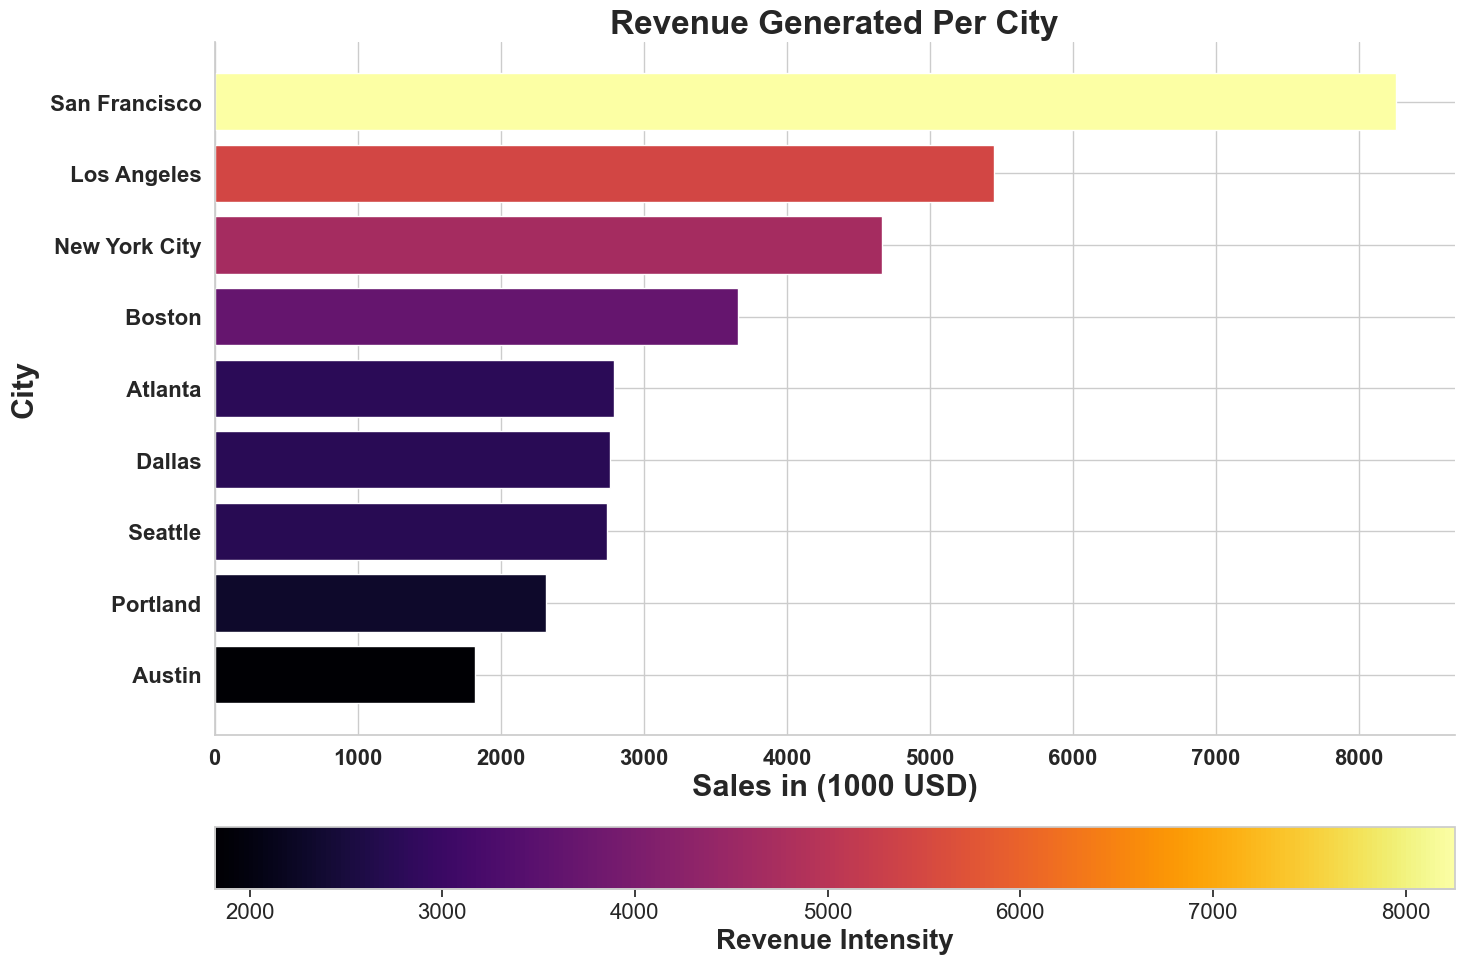

In [70]:
plt.figure(figsize=(16, 12))
norm = Normalize(vmin=city_vs_Totalsales["Total Sales"].min(),
                 vmax=city_vs_Totalsales["Total Sales"].max())
sm = ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
bars = plt.barh(y=city_vs_Totalsales["City"],
               width=city_vs_Totalsales["Total Sales"],
               color=sm.to_rgba(city_vs_Totalsales["Total Sales"]))
cbar = plt.colorbar(sm, orientation ='horizontal', pad =0.1)  # Set cbar orientation to 'horizontal'
cbar.set_label('Revenue Intensity', fontsize=20, weight='bold')
cbar.ax.tick_params(labelsize = 16) 
plt.yticks(weight='bold', fontsize=16) 
plt.xticks(weight='bold', fontsize=16)
plt.ticklabel_format(style='plain', axis='x')  # Remove scientific notation
plt.title("Revenue Generated Per City", fontsize=24, weight="bold")
plt.xlabel("Sales in (1000 USD)", fontsize=22, weight='bold')
plt.ylabel("City", fontsize=22, weight='bold')
sns.despine()
plt.show()


### Conclusion.

From the above plot we could see San Francisco is the city where most sales happen, whereas Atlanta, Dallas and Seattle experience more or less the the same amount of sales revenue and Austin is the state generating the least revenue

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

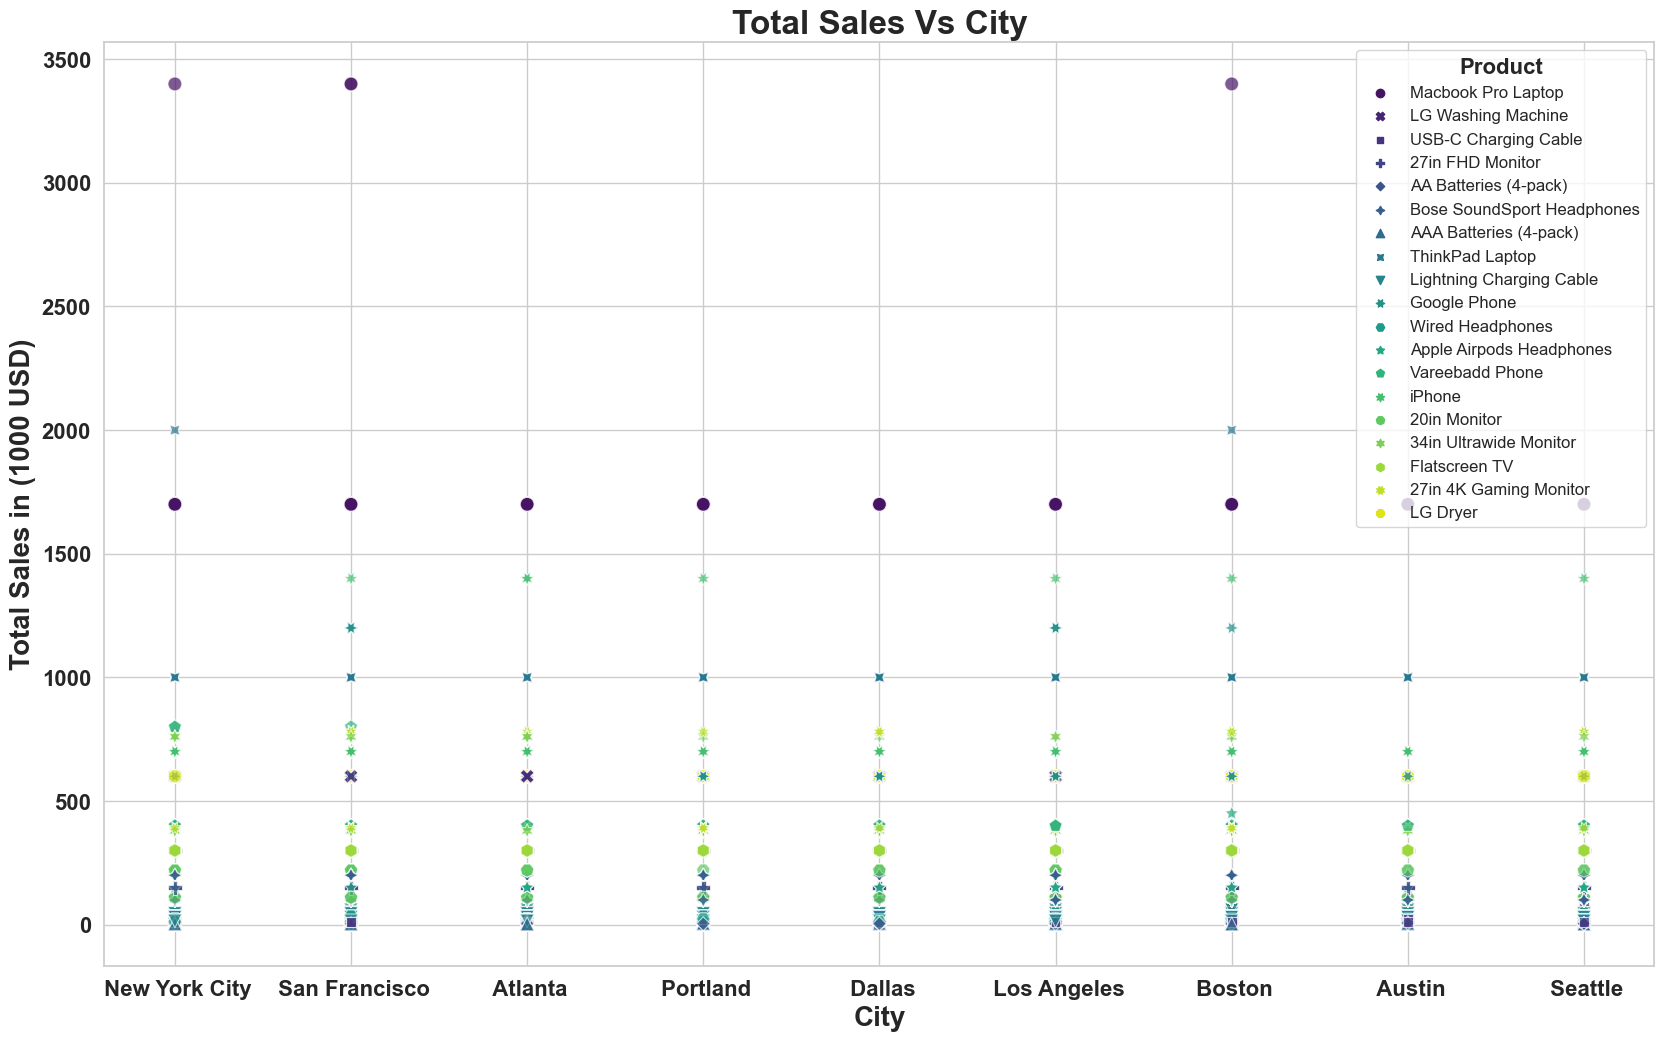

In [71]:
plt.figure(figsize = (20, 12))
sns.scatterplot(x = 'City',
                y ='Total Sales',
                data = sales_data,
               hue = sales_data['Product'],
               style = sales_data['Product'],
               palette = "viridis",
               s = 100,
               alpha = 0.7,
               )
plt.title('Total Sales Vs City', 
         fontsize = 24,
         fontweight = 'bold')
plt.xlabel('City',
           fontsize = 20,
          fontweight =  'bold')
plt.ylabel('Total Sales in (1000 USD)',
          fontsize = 20,
          fontweight = 'bold')
plt.yticks(weight='bold',
           fontsize=16) 
plt.xticks(weight='bold',
           fontsize=16)
legend = plt.legend(title = 'Product', title_fontsize = '16', fontsize = '12', loc = 'upper right')
legend.set_title(title = 'Product', prop = {'size': 16, 'weight': 'bold'})
plt.show()

### Conclusion.

From the above plot we could justify the "Revenue Generated Per City" bar  graph since we see states like San Francisco, New York, and Boston have very high sales in the most expensive commodities like the "Macbook Pro Laptop" and "Iphone", whereas states like Austin record a general low sales in almost all products regardless of the price, thus Austin record very low revenue 